<a id="1"></a>
<h1 style="color:Black; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">HOTEL BOOKING CANCELLATIONS PREDICTION</h1>

<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Introduction</h1>

> ## 1.1 Problem Statement

__In the hospitality industry, demand forecast accuracy is highly impacted by booking cancellations__, which makes demand management decisions difficult and risky. In attempting to minimize losses, hotels tend to implement restrictive cancellation policies and employ overbooking tactics, which, in turn, reduce the number of bookings and reduce revenue as well as impacting hotel reputation.

__By identifying which bookings are likely to be cancelled, revenue managers and other members of the hotel’s staff can take actions to avoid potential cancellations__ such as offering services, room upgrades, discounts, entrances to shows/amusement parks, or other perks. Knowledge of cancellation behaviour is relevant not only to hotel managers’ predictions of future revenues and capacity utilisation, but to their cancellation and pricing policies, as well.

According to [Antonio, de Almeida, and Nunes (2017)]('https://ieeexplore.ieee.org/document/8260781'), guests contacted by hotels, even without being offered nothing substantial, cancel much less than guests not contacted. So, the knowledge of cancellation can help hoteliers reduce the number of people to be contacted and with that, contribute to lower cancellation rates, at controlled costs.

The data used in this project contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

The data is originally from the article Hotel Booking Demand Datasets, written by [Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019]('https://www.sciencedirect.com/science/article/pii/S2352340918315191'). The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020]('https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md').


<img src="https://www.jetsetter.com/wp-content/uploads/sites/7/2018/04/jleQRg3N-1380x690.jpeg" alt="Hotel Lobby" style="width:690px;height:345px;">

> ## 1.2 Goal

Predict cancellation of bookings to decrease uncertainty and increase revenue

<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Library and Data</h1>

> ## 2.1 Library Import

In [1]:
# Import library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

import statsmodels.api as sm #stats summary, simple model
from statsmodels.api import OLS #Ordinary LS
from statsmodels.stats.outliers_influence import variance_inflation_factor #multicol

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

> ## 2.2 Data Dictionary

|VARIABLE                       |TYPE      |DESCRIPTION |
|:------------------------------|:---------|:-----------|
|__hotel__                      |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|__is_canceled__                |double    | Value indicating if the booking was canceled (1) or not (0) |
|__lead_time__                  |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|__arrival_date_year__          |double    | Year of arrival date|
|__arrival_date_month__         |character | Month of arrival date|
|__arrival_date_week_number__   |double    | Week number of year for arrival date|
|__arrival_date_day_of_month__  |double    | Day of arrival date|
|__stays_in_weekend_nights__   |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|__stays_in_week_nights__       |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|__adults__                     |double    | Number of adults|
|__children__                   |double    | Number of children|
|__babies__                     |double    |Number of babies |
|__meal__                       |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|__country__                    |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|__market_segment__             |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|__distribution_channel__       |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|__is_repeated_guest__          |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|__previous_cancellations__     |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|__previous_bookings_not_canceled__ |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|__reserved_room_type__         |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|__assigned_room_type__         |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|__booking_changes__            |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|__deposit_type__               |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|__agent__                      |character | ID of the travel agency that made the booking |
|__company__                    |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|__days_in_waiting_list__       |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|__customer_type__              |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|__adr__                        |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|__required_car_parking_spaces__|double    | Number of car parking spaces required by the customer |
|__total_of_special_requests__  |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|__reservation_status__         |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|__reservation_status_date__    |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

> ## 2.3 Data Loading

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(df)

,Column,d_type,unique_sample,n_uniques
0,hotel,object,"[Resort Hotel, City Hotel]",2
1,is_canceled,int64,"[0, 1]",2
2,lead_time,int64,"[342, 737, 7, 13, 14]",479
3,arrival_date_year,int64,"[2015, 2016, 2017]",3
4,arrival_date_month,object,"[July, August, September, October, November]",12
5,arrival_date_week_number,int64,"[27, 28, 29, 30, 31]",53
6,arrival_date_day_of_month,int64,"[1, 2, 3, 4, 5]",31
7,stays_in_weekend_nights,int64,"[0, 1, 2, 4, 3]",17
8,stays_in_week_nights,int64,"[0, 1, 2, 3, 4]",35
9,adults,int64,"[2, 1, 3, 4, 40]",14


> ## 2.4 Null Values

In [7]:
features_with_undefined = []
features_with_SC = []

for i in df.columns:
    if 'Undefined' in df[i].unique():
        features_with_undefined.append(i)

for i in df.columns:
    if 'SC' in df[i].unique():
        features_with_SC.append(i)
        
print(features_with_undefined)
print(features_with_SC)

['meal', 'market_segment', 'distribution_channel']
['meal']


From the data description and code above, we know that some columns (meal market_segment, distribution_channel) has 'Undefined' and 'SC' values which indicate null values. To get the real number of missing values, it is better to change these values to NaN. But if we check the data dictionary, Undefined/SC in meal column values mean that the guests do not choose the meal package in their bookings or the meal package doesn't include in the bookings. So, __I will not replace__ these values to NaN for meal column.

Meanwhile, there is not enough information for Undefined value in market_segment and distribution_channel column. So, __I will replace__ these values to NaN.

In [8]:
# Replace undefined of  market_segment and distribution_channel column to NaN
df['market_segment'].replace('Undefined',np.nan, inplace=True)
df['distribution_channel'].replace('Undefined',np.nan, inplace=True)

In [9]:
# Check percentage of null values per column
def color_null_red(val):
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

pd.DataFrame(df.isna().sum()/len(df)*100, columns= ['%Null']).style.applymap(color_null_red, subset=['%Null'])

,%Null
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


children, country, market_segment, and distribution_channel have very low percentages of missing values. Rows with null values of those columns will be dropped (dropna). Meanwhile, the company column has a very huge amount of missing values (94% of the rows are missing values). We have too little information to fill the missing values, so it is better to drop this column.  Other features, namely agent, have a percentage of missing values around 14%. We should not drop the data since it is a slightly huge missing values percentage. This column is potentially crucial for modelling, so it will be decide later what to do with this column after further investigations.

**Actions for Handling Missing Values:**
- `children, country, market_segment, distribution_channel`: drop rows of missing values
- `company`: drop column
- `agent`: decide later some checkings

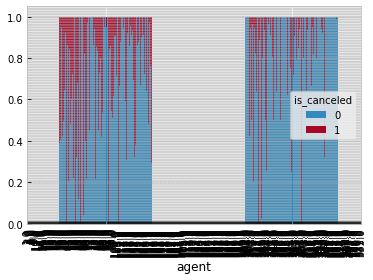

In [10]:
# Plot proportion of cancelled bookings per agent
plt.style.use('bmh')
pd.crosstab(index=df['agent'], columns=df['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [11]:
pd.DataFrame(df.corr()["is_canceled"].abs().sort_values(ascending=False))

,is_canceled
is_canceled,1.000000
lead_time,0.293123
total_of_special_requests,0.234658
required_car_parking_spaces,0.195498
booking_changes,0.144381
previous_cancellations,0.110133
is_repeated_guest,0.084793
agent,0.083114
adults,0.060017
previous_bookings_not_canceled,0.057358


Comparing to other features, the correlation of agent feature to is_canceled target is not that weak. Those missing values rows of the agent feature have the chance to have crucial information. So, it is better to impute the missing value by constant value 0 which indicate the undefined agent (simple label encoding) rather than dropping the feature.

The encoding will be done in modeling section later using pipeline.

In [12]:
# For now let's delete rows that contain NaN: children, country, market_segment, and distribution_channel 
df_dropna = df.dropna(subset=['children','country', 'market_segment','distribution_channel' ])

In [13]:
print(df.shape)
print(df_dropna.shape)

(119390, 32)
(118897, 32)


> ## 2.5 Modifying Columns

Some features are categorical but listed in int64 type in dataframe. As example, agent feature. As written in data dictionary, agent feature is the ID of the travel agency that made the booking and listed in the type of character. But in our dataframe it listed as integer/numerical feature. Same thing applies on company feature. The other features is_repeated_guest (which is actually a binary categorical feature -> 1 and 0). Hence, it's better to make them into categorical type. 

In [14]:
df_clean = df_dropna.copy()
df_clean["agent"] = df_clean["agent"].astype(str)
df_clean['agent'].replace('nan',np.nan, inplace=True)
df_clean["company"] = df_clean["company"].astype(str)
df_clean['company'].replace('nan',np.nan, inplace=True)
df_clean["is_repeated_guest"] = df_clean["is_repeated_guest"].astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal            

To simplify the dataframe i will make new features named total_guest which the total of adults, children, and babies. The original features will be dropped then.

In [15]:
df_clean['total_guests'] = df['adults']+df['children']+df['babies']
df_clean = df_clean.drop(columns=['adults','children','babies'])

Since the objective of this project is to predict the bookings cancellation of the future, it doesn't make sense if we include the arrival_date_year. arrival_date_year feature contains the year of the bookings in 2015, 2016, 2017. It's good for history analysis, but for the predicition, it's better to drop this feature.

In [16]:
df_clean = df_clean.drop(columns=['arrival_date_year','arrival_date_week_number'])
df_clean

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0,342,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,July,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,July,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,July,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,30,2,5,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,August,31,2,5,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,August,31,2,5,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,August,31,2,5,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


> ## 2.6 Remove Wrong Values

From the df.describe(), I found the presumed wrong values:
- adr feature has negative value. It does not make sense if the price is negative.
- total_guests has the value of 0. It does not make sense if no one booked the room.

In [17]:
df_clean[df_clean['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
14969,Resort Hotel,0,195,March,5,4,6,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2.0


The negative value of adr feature only contain 1 row, so let's just remove it

In [18]:
df_clean = df_clean.drop(index=14969)

In [19]:
df_clean[df_clean['total_guests']<=0]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2224,Resort Hotel,0,1,October,6,0,3,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,October,12,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,November,20,1,2,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,December,30,1,4,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,December,30,2,4,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,June,27,0,3,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,June,30,0,1,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,July,15,1,1,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,July,15,2,5,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


It contain 170. Only around 0.1% of the data. Let's just remove them

In [20]:
index_0_guests = df_clean[df_clean['total_guests']<=0].index
index_0_guests

for i in index_0_guests:
    df_clean = df_clean.drop(index=i)

In [21]:
len(df_clean)

118726

<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Exploratory Data Analysis</h1>

According to [IBM](https://www.ibm.com/cloud/learn/exploratory-data-analysis), Exploratory Data Analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

In [22]:
df_EDA = df_clean.copy()
df_EDA

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0,342,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,July,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,July,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,July,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,30,2,5,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,August,31,2,5,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,August,31,2,5,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,August,31,2,5,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


> ## 3.1 Visualization of All Categorical Features Based on is_cancel Value

In [23]:
cat_EDA = df_EDA.select_dtypes(include=['object']).columns.to_list()
cat_EDA

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

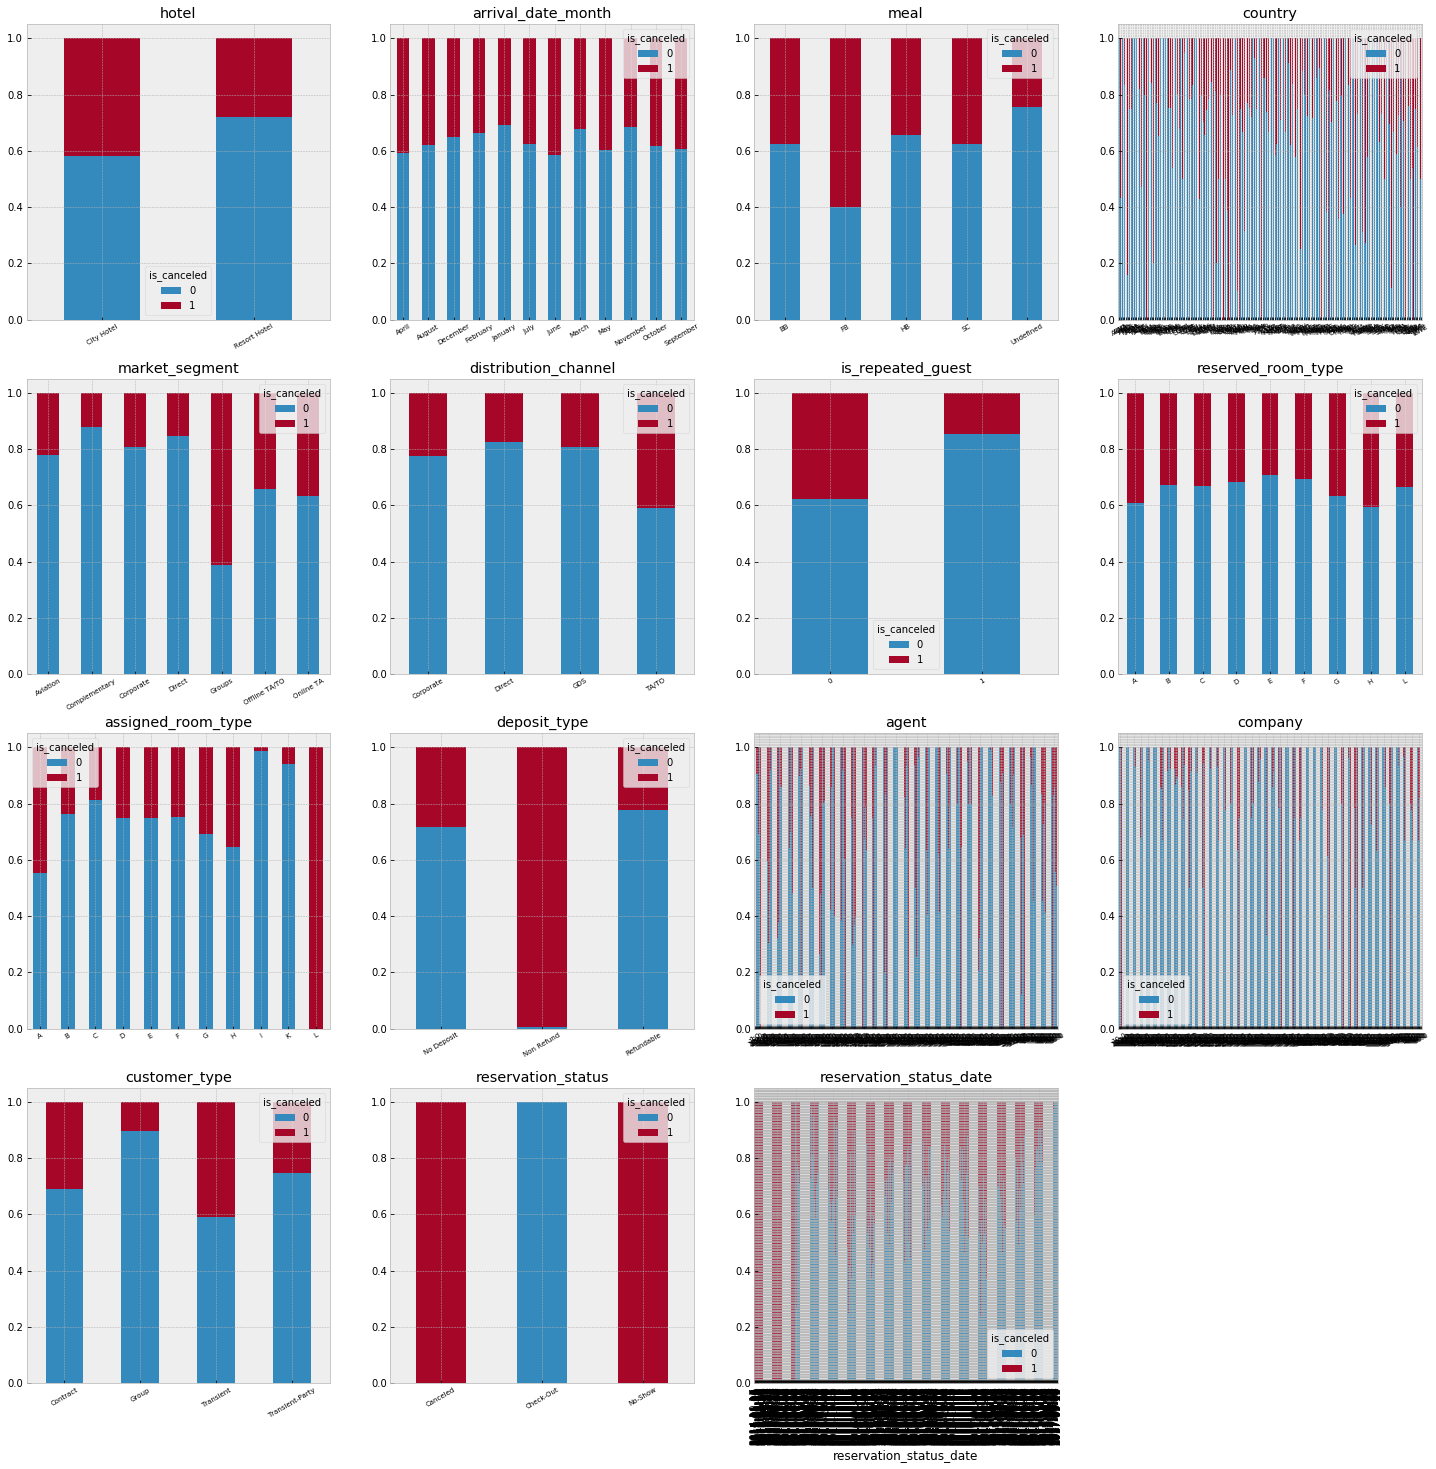

In [24]:
# Visualize Categorical Features Cross Tabulation: Percentage Based on is_canceled value
a = 1

plt.style.use('bmh')
for i in cat_EDA:
    plt.xlabel(None)
    plt.xticks(fontsize=7, rotation=30)
    axis = plt.subplot(4, 4, a)
    a += 1
    pd.crosstab(index=df_EDA[i], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True, ax=axis, figsize=(25,25))
    axis.title.set_text(i)   
plt.show()

The graphic above showing that the is_canceled percentage values are varies through the values of the other categorical features' values. This means that all the categorical features may affect the target (is_cancel).

Graphic of the reservation_status is the most interesting one, reservation_status contains the information whether guest is cancelled the booking or not.

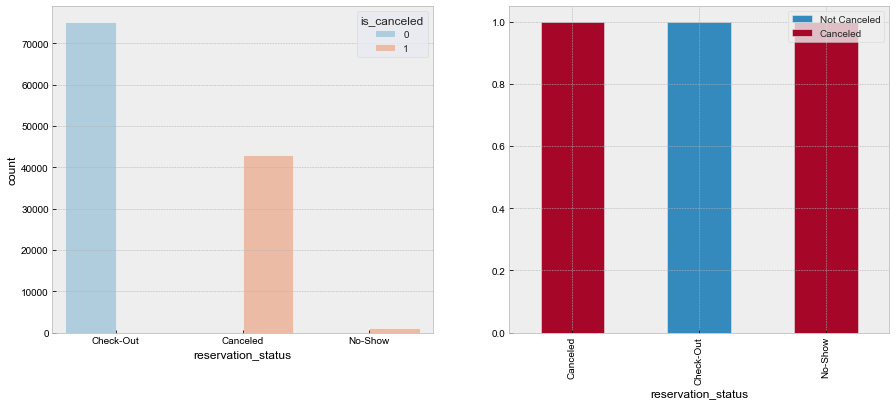

In [25]:
ax1= plt.subplot(121)
ax2 = plt.subplot(122)

sns.set_style('darkgrid')
# plt.title("Cancellation by Booking Channel", fontdict = {'fontsize':20})
sns.countplot(x = "reservation_status", hue = 'is_canceled', data = df, palette='RdBu_r', ax=ax1)
plt.legend(['Not Canceled','Canceled'])

plt.style.use('bmh')
# plt.title("Cancellation by Booking Channel", fontdict = {'fontsize':20})
pd.crosstab(index=df_EDA['reservation_status'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True, ax=ax2, figsize=(15,6))
plt.legend(['Not Canceled','Canceled'])

plt.show()

In [26]:
pd.crosstab(index=df['reservation_status'], columns=df['is_canceled'], normalize=0)

is_canceled,0,1
reservation_status,,
Canceled,0.0,1.0
Check-Out,1.0,0.0
No-Show,0.0,1.0


It is very clear how reservation_status feature related to the cancellation. It is too easy for the model to find the pattern. If the value of reservation_status is `Canceled` or `No-Show` then the is_canceled target will be 1 (cancelled). If the value of reservation_status is `Check-Out` then the is_canceled target will be 0 (not cancelled, the guest come to the hotel).

If reservation_status is kept, it is not impossible to reach 100% accuracy. Beside that, if the we want to predict whether the guest cancel the booking or not from new data, it is not possible to determine this feature, since this feature can only be filled after we know the guest cancel the booking or not. Because of that, it is better to drop this feature. The reservation_status_date also will be dropped. Considering, the proportion of null values as stated in section 2.4, company feature will be dropped also.

In [27]:
df_clean = df_clean.drop(columns=['company','reservation_status','reservation_status_date'])
df_clean

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests
0,Resort Hotel,0,342,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,2.0
1,Resort Hotel,0,737,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,2.0
2,Resort Hotel,0,7,July,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,1.0
3,Resort Hotel,0,13,July,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,1.0
4,Resort Hotel,0,14,July,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,30,2,5,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,2.0
119386,City Hotel,0,102,August,31,2,5,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,3.0
119387,City Hotel,0,34,August,31,2,5,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,2.0
119388,City Hotel,0,109,August,31,2,5,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,2.0


If we see to the graph of Categorical Features Cross Tabulation, country has too many values (177). Too simplify it I will change some features with low frequency with 'Other'

No handles with labels found to put in legend.


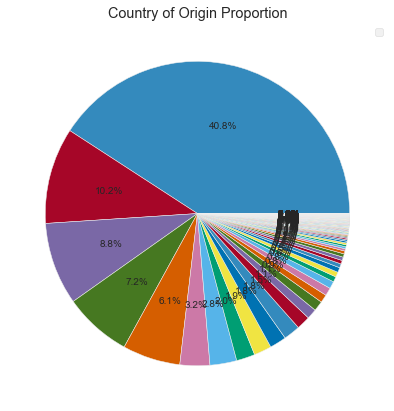

In [28]:
plt.style.use('bmh')

plt.rcParams['figure.figsize']=(7,7)
plt.pie(df_EDA['country'].value_counts(), autopct='%1.1f%%')
plt.title('Country of Origin Proportion')
plt.legend()
plt.show()

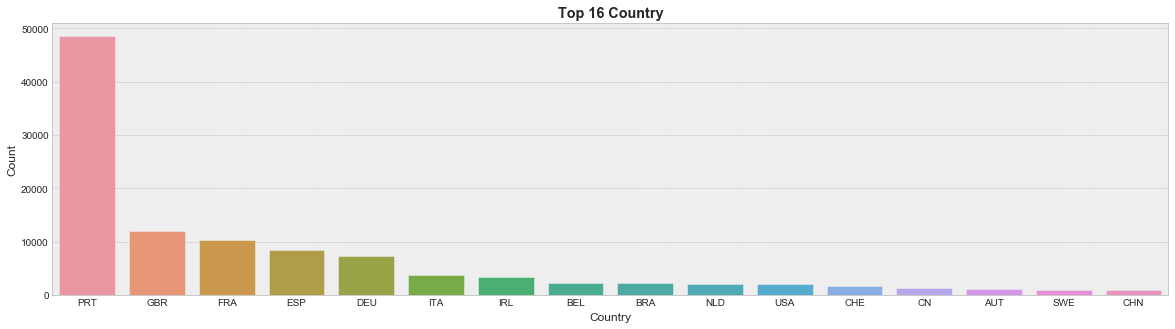

In [29]:
# Graph of Top Countries of Origin

plt.figure(figsize=(20,5))
sns.countplot(x='country', data=df_EDA, 
              order=pd.value_counts(df_EDA['country']).iloc[:16].index)
plt.title('Top 16 Country', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

> As we can see, Portugal value dominate the proportion with 40.9%. There are many countries with low frequency. These country will be replaced by 'Other' value

In [30]:
countries_count = pd.DataFrame(df_EDA['country'].value_counts())
countries_under1000 = countries_count[countries_count['country']<1000].index.to_list()

new_countries = []
for i in df_clean['country']:
    if i in countries_under1000:
        new_countries.append('Other')
    else:
        new_countries.append(i)
        
df_clean['countries'] = new_countries
df_clean = df_clean.drop(columns='country')

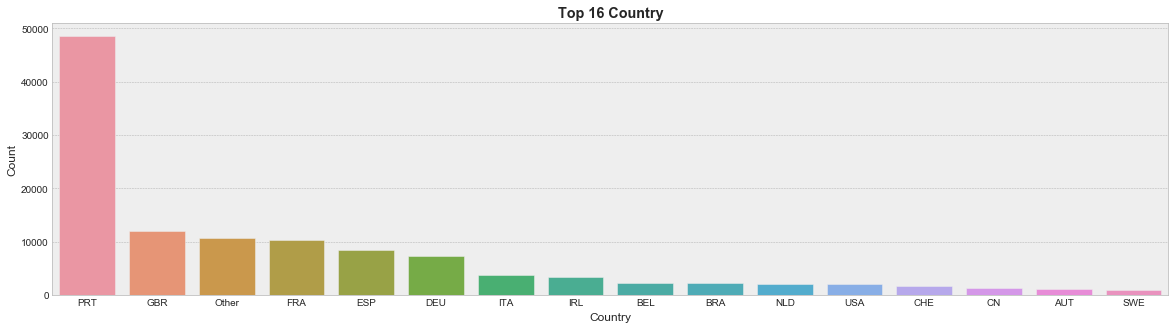

In [31]:
# Graph of Top Countries of Origin

plt.figure(figsize=(20,5))
sns.countplot(x='countries', data=df_clean, 
              order=pd.value_counts(df_clean['countries']).iloc[:16].index)
plt.title('Top 16 Country', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Now the crosstab visualization of countries feature will be like the graph below:

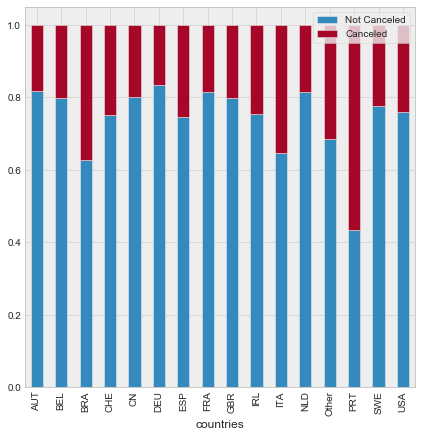

In [32]:
plt.style.use('bmh')
pd.crosstab(index=df_clean['countries'], columns=df_clean['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.legend(['Not Canceled','Canceled'])
plt.show()

> ## 3.2 Visualization of Numerical Features Based on is_cancel Value

In [33]:
# Visualize the distribution of numerical data
num_EDA = df_EDA.select_dtypes(include=['int64','float64']).columns.to_list()
num_EDA_rmv = num_EDA.copy()

## Because not all of numerical value are available to be visualized with displot (causing error: Selected KDE bandwidth is 0. Cannot estiamte density),  
## the unavailable features will be removed
ele = ['is_canceled','previous_cancellations','previous_bookings_not_canceled','booking_changes',
       'days_in_waiting_list','required_car_parking_spaces', 'total_of_special_requests','total_guests']

for i in ele: 
    num_EDA_rmv.remove(i) 

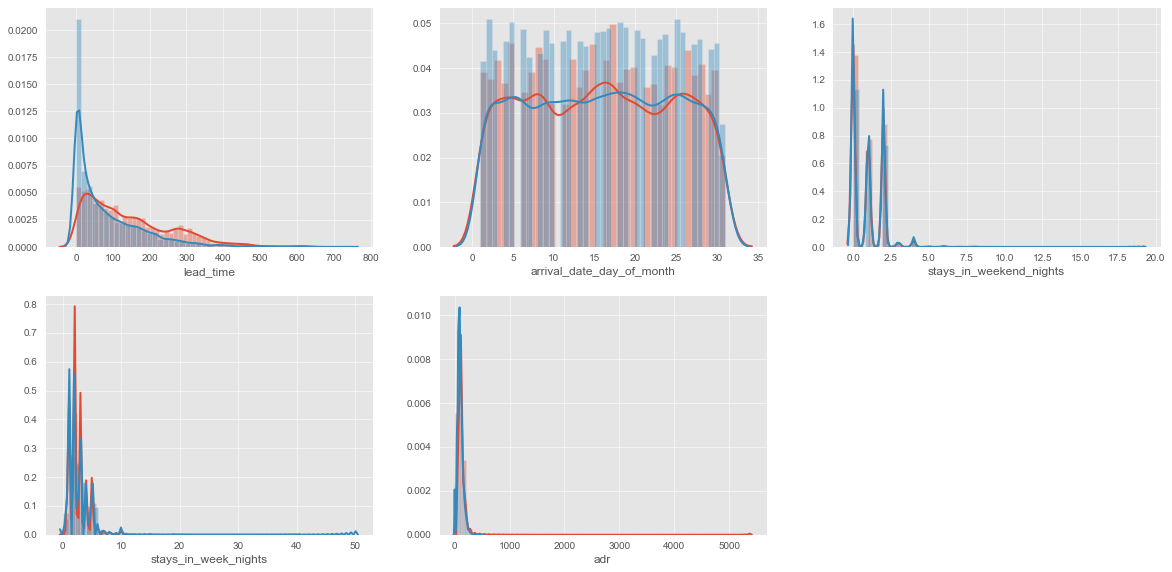

In [34]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 15))

for i in range(len(num_EDA_rmv)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[num_EDA_rmv[i]][df['is_canceled'] == 1], label='Cancelled')
    sns.distplot(df[num_EDA_rmv[i]][df['is_canceled'] == 0], label='NOT Cancelled')

> ## 3.3 Correlation

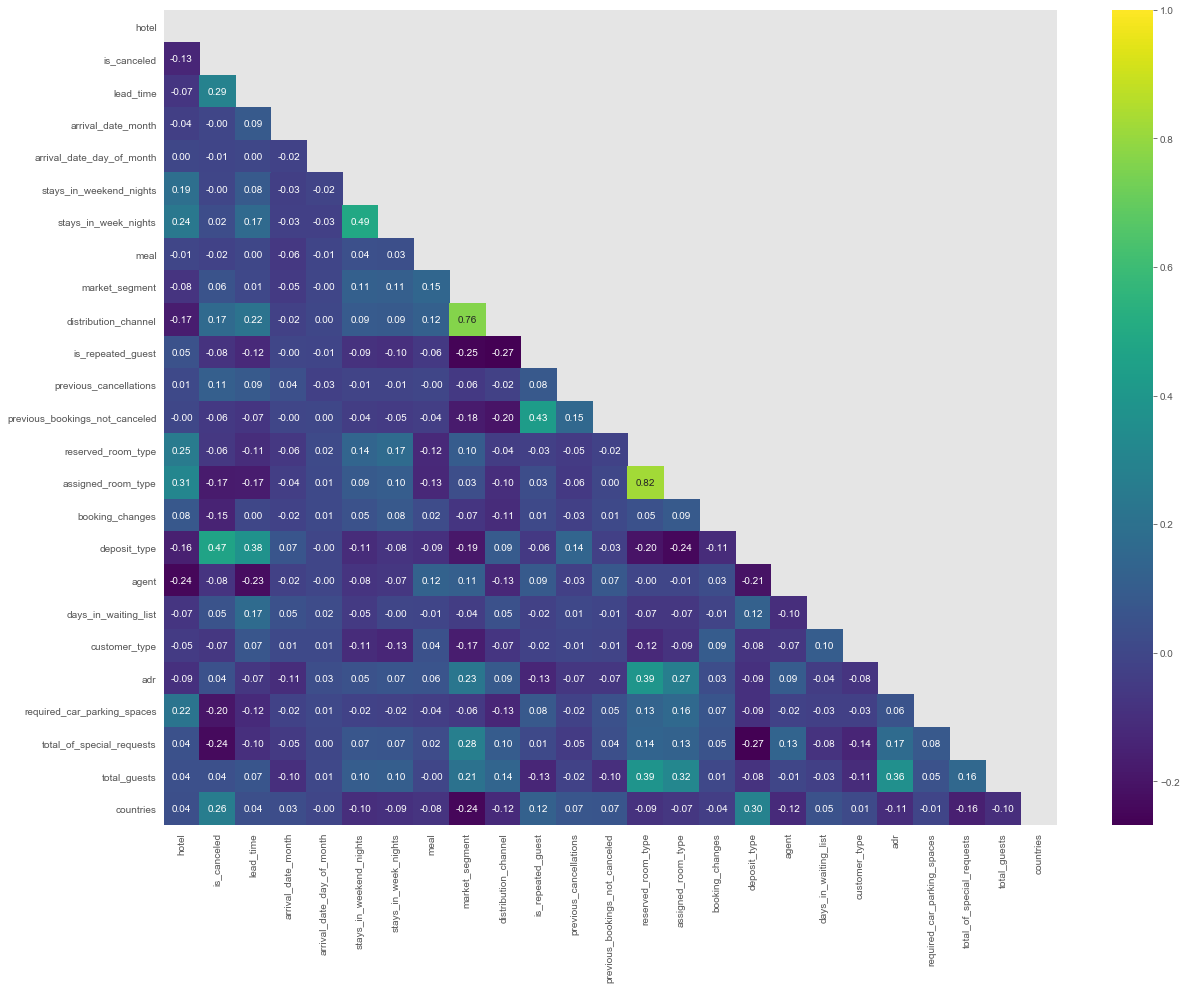

In [35]:
df_corr = df_clean.copy()
cat_corr = df_clean.select_dtypes(include=['object']).columns.to_list()
le = LabelEncoder()

for i in cat_corr:
    df_corr[i] = le.fit_transform(df_corr[i])
    masking = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', mask=masking, cmap='viridis');

From the heatmap above we can see some features are correlated strongly. Those are reserved_room_type with assigned_room_type and distribution_channel and market_segment. This strong correlation show that actually the features are similar. So, it's better to drop one each of them.

In [36]:
df_clean = df_clean.drop(columns=['reserved_room_type','market_segment'])

In [37]:
df_clean

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
0,Resort Hotel,0,342,July,1,0,0,BB,Direct,0,0,0,C,3,No Deposit,NaN,0,Transient,0.00,0,0,2.0,PRT
1,Resort Hotel,0,737,July,1,0,0,BB,Direct,0,0,0,C,4,No Deposit,NaN,0,Transient,0.00,0,0,2.0,PRT
2,Resort Hotel,0,7,July,1,0,1,BB,Direct,0,0,0,C,0,No Deposit,NaN,0,Transient,75.00,0,0,1.0,GBR
3,Resort Hotel,0,13,July,1,0,1,BB,Corporate,0,0,0,A,0,No Deposit,304.0,0,Transient,75.00,0,0,1.0,GBR
4,Resort Hotel,0,14,July,1,0,2,BB,TA/TO,0,0,0,A,0,No Deposit,240.0,0,Transient,98.00,0,1,2.0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,30,2,5,BB,TA/TO,0,0,0,A,0,No Deposit,394.0,0,Transient,96.14,0,0,2.0,BEL
119386,City Hotel,0,102,August,31,2,5,BB,TA/TO,0,0,0,E,0,No Deposit,9.0,0,Transient,225.43,0,2,3.0,FRA
119387,City Hotel,0,34,August,31,2,5,BB,TA/TO,0,0,0,D,0,No Deposit,9.0,0,Transient,157.71,0,4,2.0,DEU
119388,City Hotel,0,109,August,31,2,5,BB,TA/TO,0,0,0,A,0,No Deposit,89.0,0,Transient,104.40,0,0,2.0,GBR


> ## 3.4 Each Features Analysis

<br>**How is the proportion of cancelled bookings?**
<br>

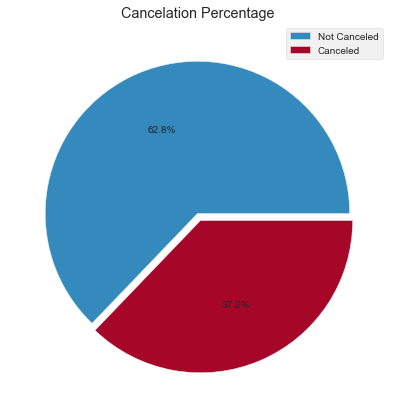

In [38]:
plt.style.use('bmh')

plt.rcParams['figure.figsize']=(7,7)
plt.pie(df_EDA['is_canceled'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('Cancelation Percentage')
plt.legend(['Not Canceled','Canceled'])
plt.show()

> ##### Explanation:
> The proportion of cancelled bookings and not cancelled bookings is imbalance. Cancelled class shares 37% proportion of the data. In general it can be said that there is almost 2 cancellation in 5 bookings. Since the target class is imbalance, some adjustment will be made to overcome this problem later in modeling section of this project using pipeline.

<br>

<br>**How is the distribution of cancellation based on Booking Channel?**
<br>

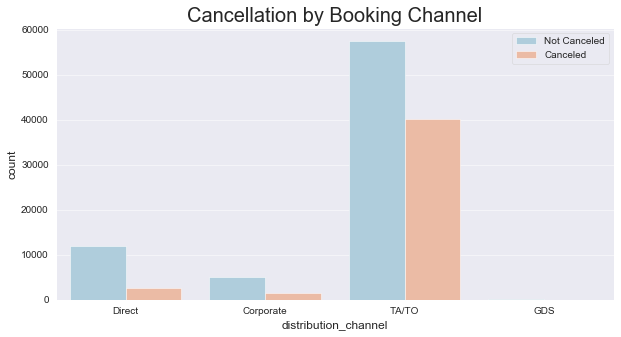

In [39]:
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
plt.title("Cancellation by Booking Channel", fontdict = {'fontsize':20})
sns.countplot(x = "distribution_channel", hue = 'is_canceled', data = df_EDA, palette='RdBu_r')
plt.legend(['Not Canceled','Canceled'])

plt.show()

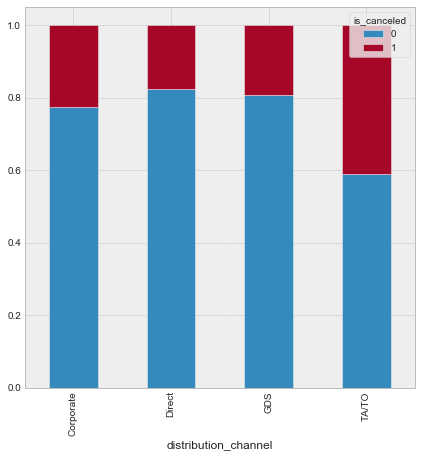

In [40]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['distribution_channel'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [41]:
pd.crosstab(index=df_EDA['distribution_channel'], columns=df_EDA['is_canceled'], normalize=0)

is_canceled,0,1
distribution_channel,,
Corporate,0.775340,0.224660
Direct,0.824071,0.175929
GDS,0.808290,0.191710
TA/TO,0.589139,0.410861


> ##### Explanation:
> The cancelled booking mostly occured in Travel Agent/Tour Operator booking channel. This booking channel also has the highest cancellation rate (41% of the bookings are cancelled) compared with the other booking channels

<br>

<br>**How is the cancellation per hotel type?**
<br>

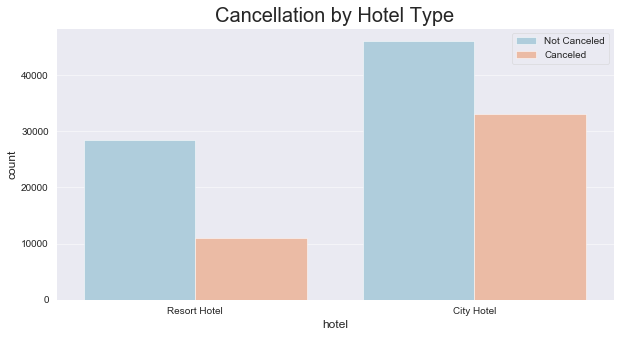

In [43]:
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
plt.title("Cancellation by Hotel Type", fontdict = {'fontsize':20})
sns.countplot(x = "hotel", hue = 'is_canceled', data = df_EDA, palette='RdBu_r')
plt.legend(['Not Canceled','Canceled'])

plt.show()

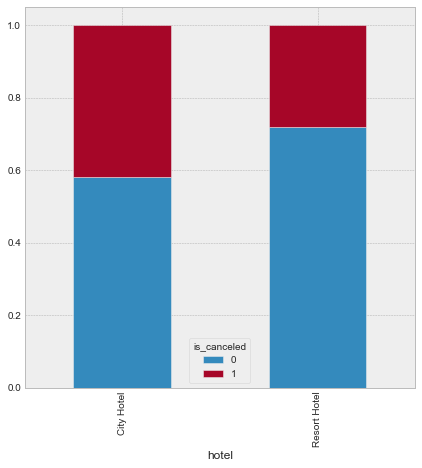

In [44]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['hotel'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [45]:
pd.crosstab(index=df_EDA['hotel'], columns=df_EDA['is_canceled'], normalize=0)

is_canceled,0,1
hotel,,
City Hotel,0.582262,0.417738
Resort Hotel,0.720158,0.279842


> ##### Explanation:
> The cancelled booking mostly occured in City Hotel. The cancellation rate in city hotel is also higher dan resort hotel. It is probably due to uncertainty in business matter or events that occurred in city.

<br>

<br>**How is the distribution of cancellation per month?**
<br>

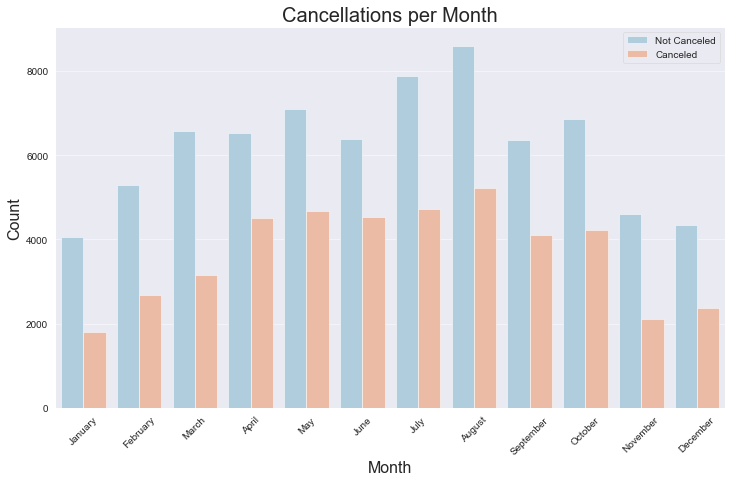

In [46]:
monthorder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 7))

sns.set_style('darkgrid')
plt.title("Cancellations per Month", fontdict = {'fontsize':20})
sns.countplot(x = "arrival_date_month", hue = 'is_canceled', data = df_EDA, palette='RdBu_r', order=monthorder)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=16)
plt.legend(['Not Canceled','Canceled'])

plt.show()

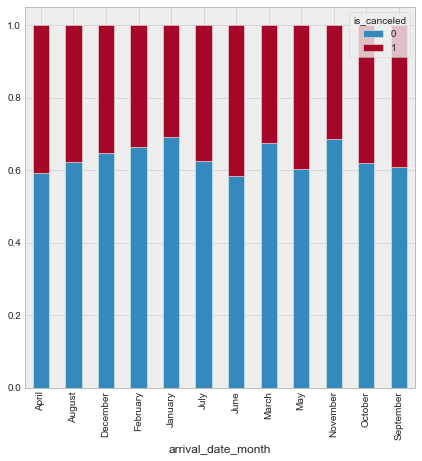

In [47]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['arrival_date_month'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [48]:
pd.crosstab(index=df_EDA['arrival_date_month'], columns=df_EDA['is_canceled'], normalize=0).style.bar(subset=[1], color='#fadede')

is_canceled,0,1
arrival_date_month,,
April,0.591411,0.408589
August,0.621856,0.378144
December,0.647839,0.352161
February,0.663249,0.336751
January,0.692295,0.307705
July,0.624822,0.375178
June,0.584776,0.415224
March,0.675968,0.324032
May,0.602566,0.397434


> ##### Explanation:
> The cancelled booking tend to increase following the increment of number of bookings in each month. April and June have the highest cancellation rate of all month.

<br>

__How many cancellation per day in each month?__

In [176]:
df_cancel = df_EDA[df_EDA['is_canceled']==1]
df_not_cancel = df_EDA[df_EDA['is_canceled']==0]
group_cancel = df_cancel.groupby(['arrival_date_month']).agg('count')['is_canceled'].to_list()
group_not_cancel = df_not_cancel.groupby(['arrival_date_month']).agg('count')['is_canceled'].to_list()
cancel_month = pd.DataFrame({'month':monthorder, 'cancel':group_cancel, 'not_cancel':group_not_cancel})
cancel_month['total_booking'] = cancel_month['cancel']+cancel_month['not_cancel']

total_day = []
for i in cancel_month['month']:
    if i in ['January','March','May','July','August','October','December']:
        total_day.append(31)
    elif i == 'February':
        total_day.append(28)
    else:
        total_day.append(30)
        
cancel_month['total_day'] = total_day
cancel_month['avg_cancel'] = cancel_month['cancel']/cancel_month['total_day']
cancel_month

,month,cancel,not_cancel,total_booking,total_day,avg_cancel
0,January,1805,4061,5866,31,58.225806
1,February,2693,5304,7997,28,96.178571
2,March,3147,6565,9712,31,101.516129
3,April,4510,6528,11038,30,150.333333
4,May,4677,7091,11768,31,150.870968
5,June,4533,6384,10917,30,151.100000
6,July,4731,7879,12610,31,152.612903
7,August,5232,8604,13836,31,168.774194
8,September,4099,6360,10459,30,136.633333
9,October,4228,6854,11082,31,136.387097


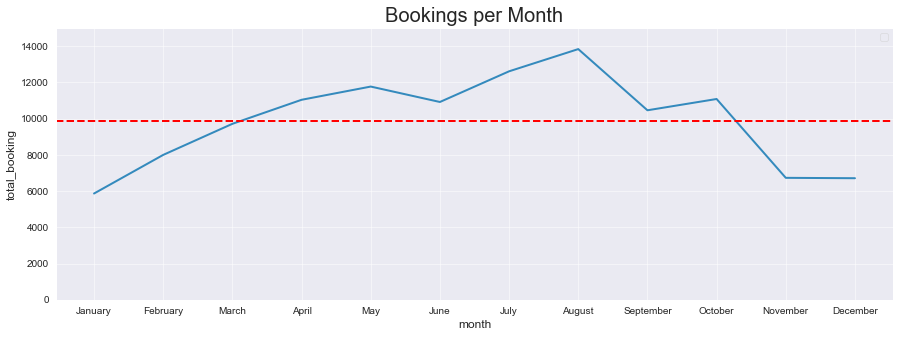

In [186]:
# cancel_month["month"] = pd.Categorical(cancel_month["month"], categories=monthorder, ordered=True)

plt.figure(figsize = (15,5))
plt.ylim(0,15000)
plt.title("Bookings per Month", fontdict = {'fontsize':20})
plt.legend(['Not Canceled','Canceled'])
ax1 = sns.lineplot(x = "month", y='total_booking', data = cancel_month)
ax1.axhline(cancel_month['total_booking'].mean(), ls='--',color='red')
plt.show()

In [188]:
cancel_month['avg_cancel'].mean()

120.79373399897595

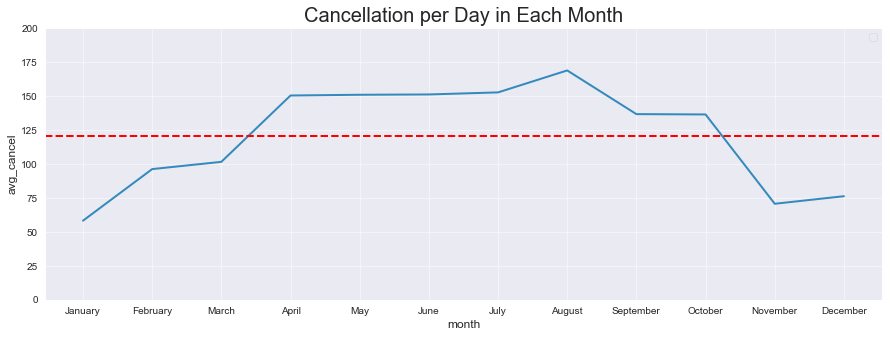

In [184]:
cancel_month["month"] = pd.Categorical(cancel_month["month"], categories=monthorder, ordered=True)

plt.figure(figsize = (15,5))
plt.ylim(0,200)
plt.title("Cancellation per Day in Each Month", fontdict = {'fontsize':20})
plt.legend(['Not Canceled','Canceled'])
ax2 = sns.lineplot(x = "month", y='avg_cancel', data = cancel_month)
ax2.axhline(cancel_month['avg_cancel'].mean(), ls='--',color='red')
plt.show()

> ##### Explanation:
> Months of April to October have cancellation per day above monthly average. August is the peak. Since August is the month with the most bookings/demands, maybe it is worth to try setting restrictive booking cancellation policies in August or even April to October. According to [roughguides.com](https://www.roughguides.com/portugal/when-to-go/), the best time of year to visit Portugal is spring (ie, from February) or early autumn (September–October), when the weather is not too hot, the sea is warm and the summer crowds have thinned out. The lower temperatures during these months also make for ideal sightseeing weather.

<br>

<br>**How is the distribution of cancellation based on Room Type?**
<br>

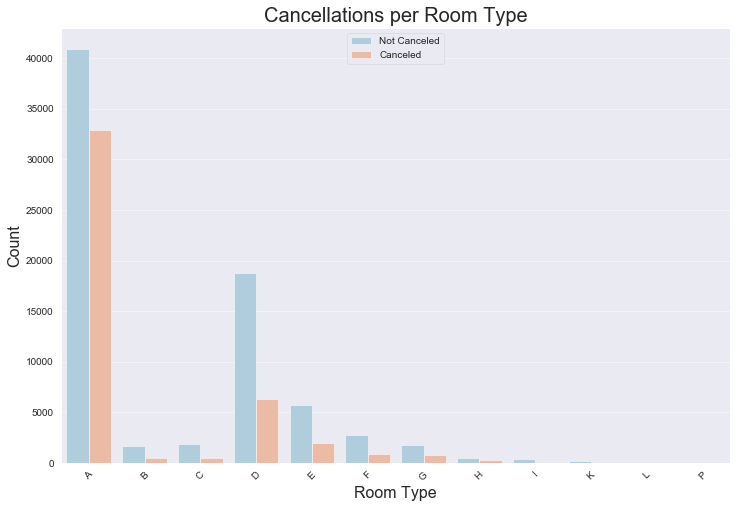

In [56]:
plt.figure(figsize=(12, 8))

sns.set_style('darkgrid')
plt.title("Cancellations per Room Type", fontdict = {'fontsize':20})
sns.countplot(x = "assigned_room_type", hue = 'is_canceled', data = df_EDA, palette='RdBu_r', order=['A','B','C','D','E','F','G','H','I','K','L','P'])
plt.xlabel("Room Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=16)
plt.legend(['Not Canceled','Canceled'])

plt.show()

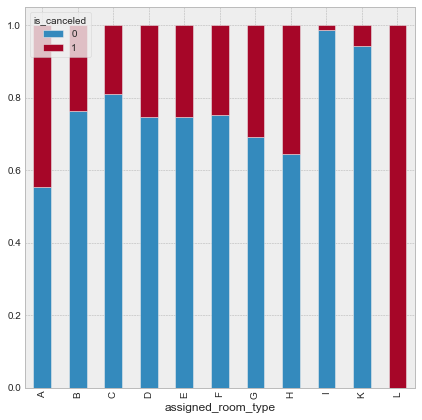

In [57]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['assigned_room_type'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [58]:
pd.crosstab(index=df_EDA['assigned_room_type'], columns=df_EDA['is_canceled'], normalize=0).style.bar(subset=[1], color='#fadede')

is_canceled,0,1
assigned_room_type,,
A,0.554376,0.445624
B,0.764186,0.235814
C,0.810983,0.189017
D,0.747267,0.252733
E,0.746960,0.253040
F,0.751876,0.248124
G,0.692308,0.307692
H,0.644979,0.355021
I,0.985836,0.014164


In [59]:
print(len(df[df['assigned_room_type']=='L']))
print(len(df[df['assigned_room_type']=='P']))

1
12


> ##### Explanation:
> Room type A is the most booked room type. Apart from room type L and P, which only have very few samples, room type A has the highest cancellation rate among the others. Around 44% of the bookings linked to room type A is cancelled.

<br>

<br>**How is the distribution of cancellation based on Booking Lead Time?**
<br>

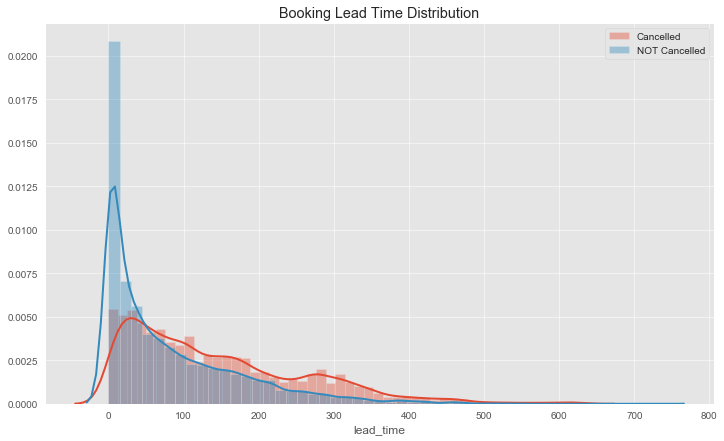

In [60]:
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
plt.title('Booking Lead Time Distribution')
sns.distplot(df_EDA[df_EDA['is_canceled'] == 1]['lead_time'], label='Cancelled')
sns.distplot(df_EDA[df_EDA['is_canceled'] == 0]['lead_time'], label='NOT Cancelled')
plt.legend(loc= 'upper right')
plt.show()

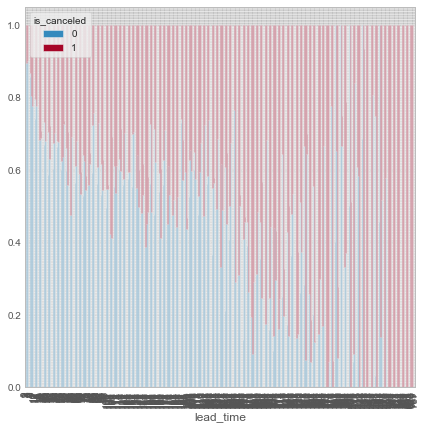

In [61]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['lead_time'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

> ##### Explanation:
> The longer the lead time, the higher the chance the booking is cancelled. It is probably because there is plan change or other uncertainty since there are many things happen during that long lead time. 

<br>

<br>**How is the distribution of cancellation based on Customer Type?**
<br>

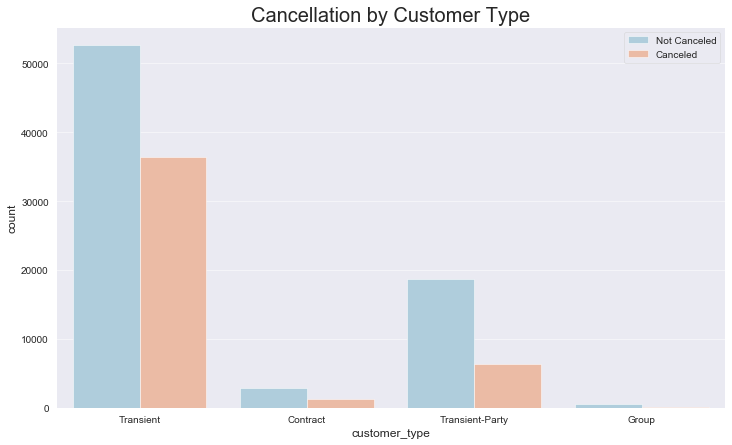

In [62]:
plt.figure(figsize = (12,7))
sns.set_style('darkgrid')
plt.title("Cancellation by Customer Type", fontdict = {'fontsize':20})
sns.countplot(x = "customer_type", hue = 'is_canceled', data = df_EDA, palette='RdBu_r')
plt.legend(['Not Canceled','Canceled'])

plt.show()

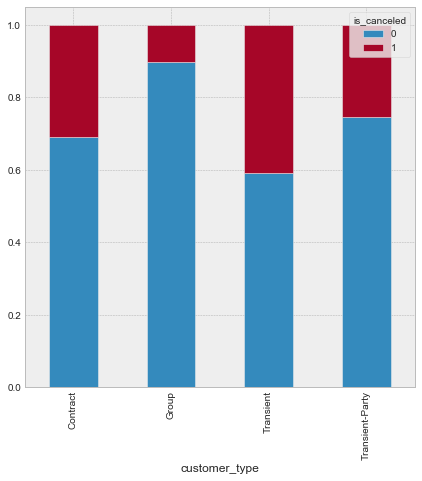

In [63]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['customer_type'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [64]:
pd.crosstab(index=df_EDA['customer_type'], columns=df_EDA['is_canceled'], normalize=0)

is_canceled,0,1
customer_type,,
Contract,0.690079,0.309921
Group,0.897887,0.102113
Transient,0.590668,0.409332
Transient-Party,0.745657,0.254343


<br>**How is the distribution of cancellation based on Deposit Type?**
<br>

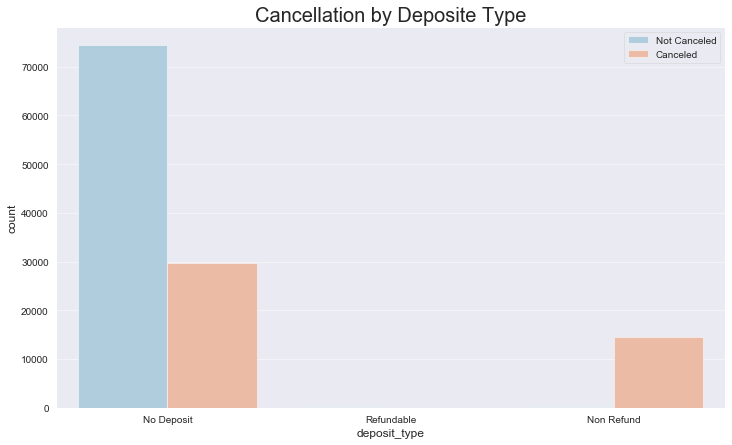

In [65]:
plt.figure(figsize = (12,7))
sns.set_style('darkgrid')
plt.title("Cancellation by Deposite Type", fontdict = {'fontsize':20})
sns.countplot(x = "deposit_type", hue = 'is_canceled', data = df_EDA, palette='RdBu_r')
plt.legend(['Not Canceled','Canceled'])

plt.show()

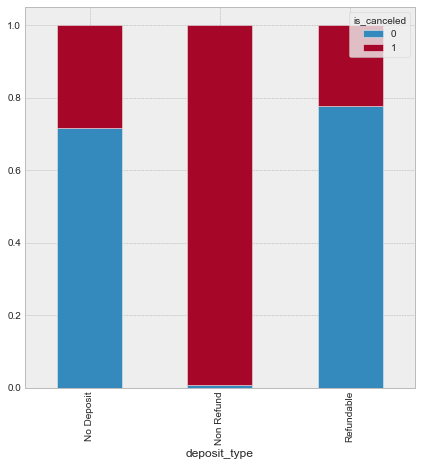

In [66]:
plt.style.use('bmh')
pd.crosstab(index=df_EDA['deposit_type'], columns=df_EDA['is_canceled'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [67]:
pd.crosstab(index=df_EDA['deposit_type'], columns=df_EDA['is_canceled'], normalize=0)

is_canceled,0,1
deposit_type,,
No Deposit,0.715148,0.284852
Non Refund,0.006382,0.993618
Refundable,0.777778,0.222222


This feature is a bit confusing. Around 99% of no-refund bookings are actually cancelled. In other words, prospective guests throw away their money for free just to book a room that they don't occupy. This does not make sense and is also inconsistent with some literature which states that generally a non-refundable deposit policy will influence guests not to cancel their boooking. Therefore, feature deposit will not be used.

In [68]:
df_clean = df_clean.drop(columns='deposit_type')

<br>**How is the distribution of cancellation based on price?**
<br>

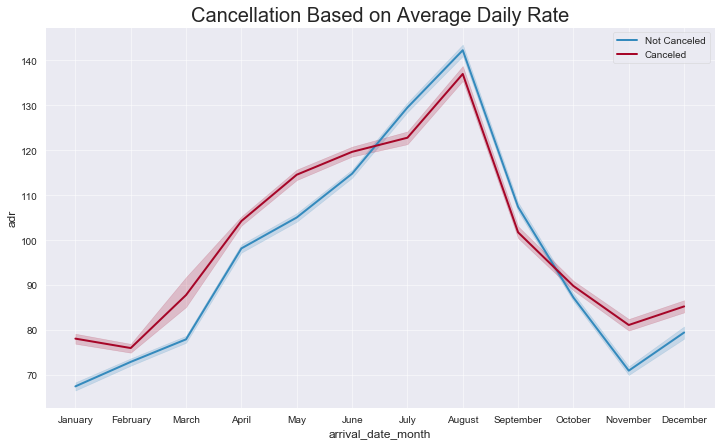

In [69]:
df_EDA["arrival_date_month"] = pd.Categorical(df_EDA["arrival_date_month"], categories=monthorder, ordered=True)

plt.figure(figsize = (12,7))
sns.set_style('darkgrid')
plt.title("Cancellation Based on Average Daily Rate", fontdict = {'fontsize':20})
sns.lineplot(x = "arrival_date_month", y='adr', hue = 'is_canceled', data = df_EDA)
plt.legend(['Not Canceled','Canceled'])

plt.show()

> ##### Explanation:
> Average price per night of the reservation (ADR) tends to peak during the summer, which is possibly due to high demand during the summer holiday. **In 9 of 12 months (apart of July-September), the cancellation occurs in the higher average price**. It can be said that price probably has impact of the cancelation decision.
    
<br>

<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">4. Export Data for Modeling</h1>

In [60]:
df_clean.to_csv(r'df_for_modeling.csv')

In [61]:
df_for_modeling = pd.read_csv('df_for_modeling.csv')
df_for_modeling

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
0,0,Resort Hotel,0,342,July,1,0,0,BB,Direct,0,0,0,C,3,NaN,0,Transient,0.00,0,0,2.0,PRT
1,1,Resort Hotel,0,737,July,1,0,0,BB,Direct,0,0,0,C,4,NaN,0,Transient,0.00,0,0,2.0,PRT
2,2,Resort Hotel,0,7,July,1,0,1,BB,Direct,0,0,0,C,0,NaN,0,Transient,75.00,0,0,1.0,GBR
3,3,Resort Hotel,0,13,July,1,0,1,BB,Corporate,0,0,0,A,0,304.0,0,Transient,75.00,0,0,1.0,GBR
4,4,Resort Hotel,0,14,July,1,0,2,BB,TA/TO,0,0,0,A,0,240.0,0,Transient,98.00,0,1,2.0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,119385,City Hotel,0,23,August,30,2,5,BB,TA/TO,0,0,0,A,0,394.0,0,Transient,96.14,0,0,2.0,BEL
118722,119386,City Hotel,0,102,August,31,2,5,BB,TA/TO,0,0,0,E,0,9.0,0,Transient,225.43,0,2,3.0,FRA
118723,119387,City Hotel,0,34,August,31,2,5,BB,TA/TO,0,0,0,D,0,9.0,0,Transient,157.71,0,4,2.0,DEU
118724,119388,City Hotel,0,109,August,31,2,5,BB,TA/TO,0,0,0,A,0,89.0,0,Transient,104.40,0,0,2.0,GBR


In [ ]:
SELECT customer_type, SUM(total_guest) AS jumlah_guest 
FROM df
# WHERE distribution_channel = 'Direct'
GROUP BY customer_type
HAVING distribution_channel = 'Direct'